In [ ]:
!pip install xgboost shap lime scikit-learn matplotlib seaborn

# Import libraries
import pandas as pd
import numpy as np
import xgboost as xgb
import shap
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, StratifiedKFold
from lime.lime_tabular import LimeTabularExplainer
import seaborn as sns

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=fbf6def4d6b8dded7069bc18a4b6c14dbf98931488cb2c83a329953d17b7f75c
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [ ]:
# Load validation set
validation_df = pd.read_csv("alz_validation.csv")
test_df=pd.read_csv("alz_test.csv")

# Define the selected 16 features and target column
features = [
    'MMSE', 'FunctionalAssessment', 'ADL', 'MemoryComplaints', 'BehavioralProblems',
    'Forgetfulness', 'Confusion', 'Disorientation', 'DifficultyCompletingTasks',
    'PersonalityChanges', 'FamilyHistoryAlzheimers', 'Depression', 'HeadInjury',
    'Hypertension', 'CardiovascularDisease', 'Diabetes'
]
target = 'Diagnosis'

# Prepare validation X and y
X_valid = validation_df[features]
y_valid = validation_df[target]

X_val = test_df[features]
y_val = test_df[target]

In [ ]:
  # Define the model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', importance_type='gain', random_state=42)

  # Train the model on validation data
xgb_model.fit(X_valid, y_valid)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:21:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

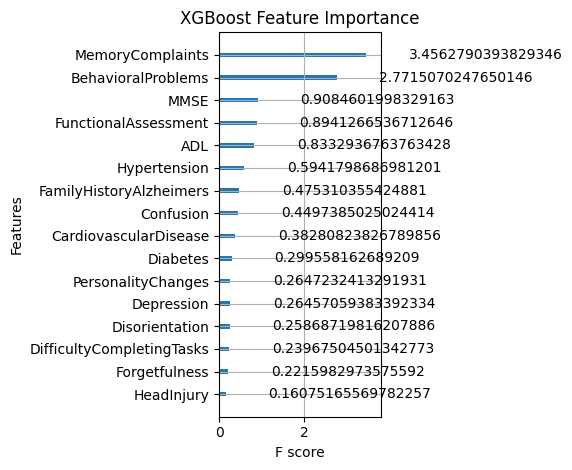

In [ ]:
# Plot feature importances from XGBoost
xgb.plot_importance(xgb_model, importance_type='gain', title='XGBoost Feature Importance')
plt.tight_layout()
plt.show()

In [ ]:
!pip install shap

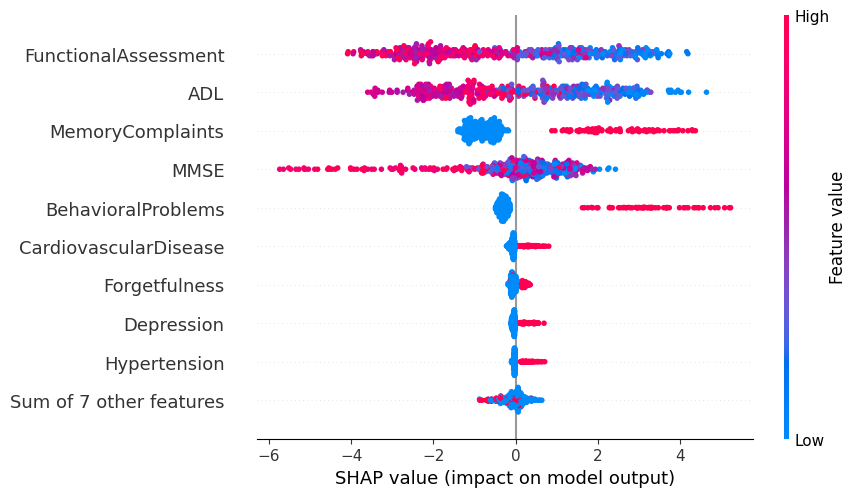

In [ ]:
import shap

# Create a TreeExplainer and compute SHAP values
explainer = shap.Explainer(xgb_model, X_val)
shap_values = explainer(X_val)

# Global summary plot (which features have most impact)
shap.plots.beeswarm(shap_values)

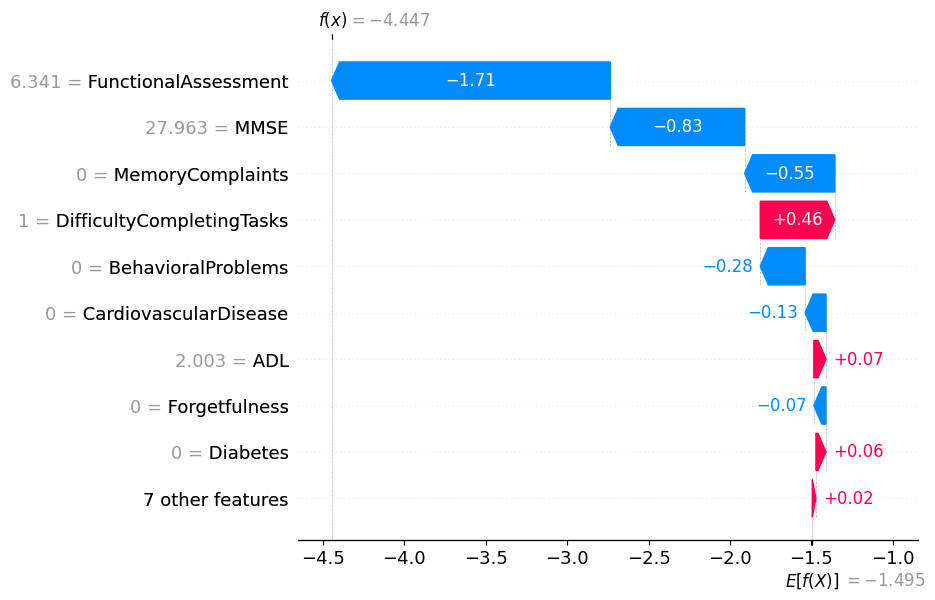

In [ ]:
# Explain the first observation
shap.plots.waterfall(shap_values[0])

In [ ]:
from lime.lime_tabular import LimeTabularExplainer

# Create the LIME explainer
lime_explainer = LimeTabularExplainer(
    training_data=np.array(X_val),
    feature_names=features,
    class_names=['No AD', 'AD'],
    mode='classification'
)

# Explain the first instance
idx = 0
lime_exp = lime_explainer.explain_instance(X_val.iloc[idx], xgb_model.predict_proba)
lime_exp.show_in_notebook(show_table=True)

/usr/local/lib/python3.11/dist-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.11/dist-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.11/dist-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Define Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Re-train model on CV splits from validation set
cv_scores = cross_val_score(xgb_model, X_val, y_val, cv=skf, scoring='accuracy')

# Print results
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))
print("Standard Deviation:", np.std(cv_scores))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:23:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:23:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:23:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:23:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Cross-Validation Accuracy Scores: [0.90697674 0.93023256 0.91860465 0.86046512 0.88372093]
Mean Accuracy: 0.9
Standard Deviation: 0.025047278172718616


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:23:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:23:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:23:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:23:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:23:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:23:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Cross-Validated Accuracy: 0.9023255813953488

Classification Report:
               precision    recall  f1-score   support

       No AD       0.91      0.95      0.93       291
          AD       0.88      0.81      0.84       139

    accuracy                           0.90       430
   macro avg       0.89      0.88      0.89       430
weighted avg       0.90      0.90      0.90       430

Confusion Matrix:
 [[275  16]
 [ 26 113]]


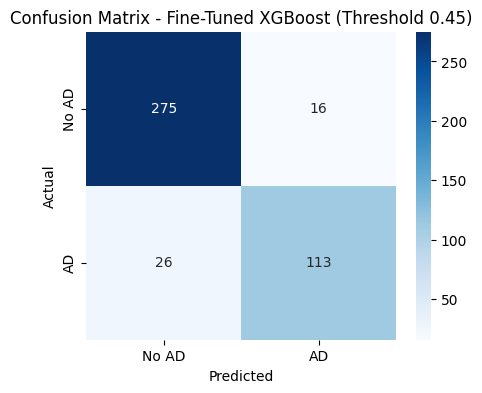

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create containers
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
all_y_true = []
all_y_pred = []

# Loop through folds and collect predictions
for train_index, test_index in skf.split(X_val, y_val):
    X_train_fold, X_test_fold = X_val.iloc[train_index], X_val.iloc[test_index]
    y_train_fold, y_test_fold = y_val.iloc[train_index], y_val.iloc[test_index]

    # Fine-tuned XGBoost model
    model = xgb.XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42,
        max_depth=4,
        learning_rate=0.1,
        n_estimators=100,
        subsample=0.9,
        colsample_bytree=0.9,
        scale_pos_weight=1.2  # Increase sensitivity to AD class (positive class)
    )
    model.fit(X_train_fold, y_train_fold)

    # Predict probabilities and apply adjusted threshold
    y_proba_fold = model.predict_proba(X_test_fold)[:, 1]
    y_pred_fold = (y_proba_fold >= 0.45).astype(int)

    # Store results
    all_y_true.extend(y_test_fold)
    all_y_pred.extend(y_pred_fold)

# Evaluate
conf_matrix_cv = confusion_matrix(all_y_true, all_y_pred)
report_cv = classification_report(all_y_true, all_y_pred, target_names=["No AD", "AD"])
accuracy_cv = accuracy_score(all_y_true, all_y_pred)

# Print results
print("Cross-Validated Accuracy:", accuracy_cv)
print("\nClassification Report:\n", report_cv)
print("Confusion Matrix:\n", conf_matrix_cv)

# Plot confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix_cv, annot=True, fmt='d', cmap='Blues', xticklabels=["No AD", "AD"], yticklabels=["No AD", "AD"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Fine-Tuned XGBoost (Threshold 0.45)")
plt.show()

Test Set Evaluation Metrics:
Accuracy: 0.9233
Precision: 0.9015
Recall: 0.8561
F1-Score: 0.8782
ROC-AUC Score: 0.9491


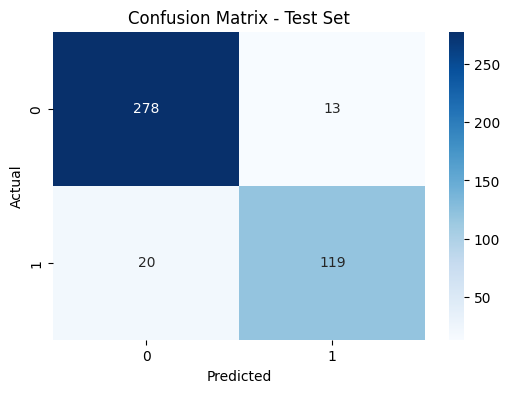

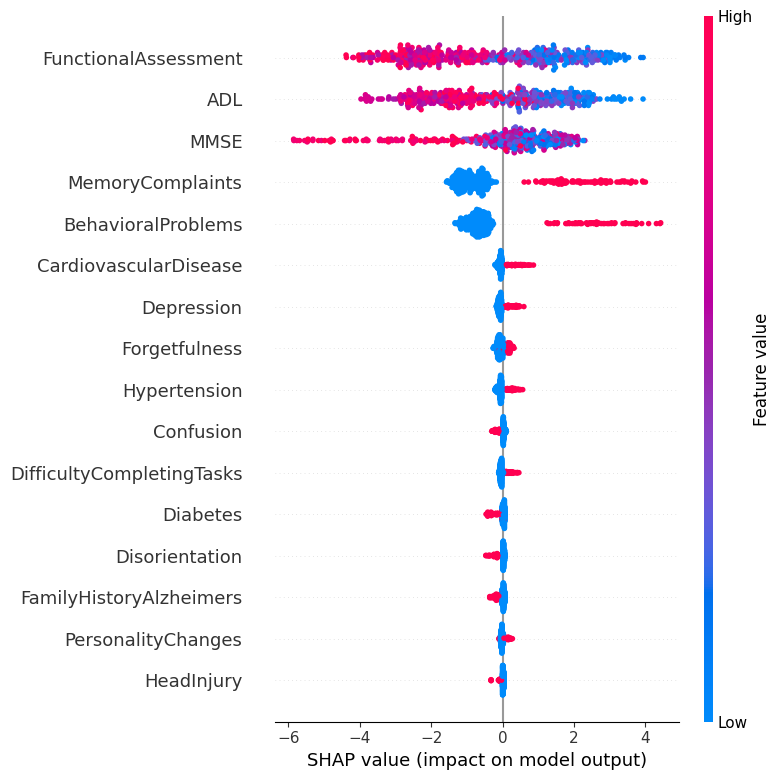

/usr/local/lib/python3.11/dist-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.11/dist-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.11/dist-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.

In [ ]:
# --- Final Evaluation on Test Set (using xgb_model) ---

# Load test dataset
import pandas as pd

test_data = pd.read_csv('alz_test.csv')
X_test = test_data[features]  # Use the 'features' list to select columns
y_test = test_data['Diagnosis']

# Predict on test data
y_test_pred = xgb_model.predict(X_test)
y_test_probs = xgb_model.predict_proba(X_test)[:, 1]

# Evaluate metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

print("Test Set Evaluation Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_test_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_test_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_test_pred):.4f}")
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_test_probs):.4f}")

# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# SHAP Interpretation
import shap

# Create SHAP explainer
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)

# SHAP summary plot
shap.summary_plot(shap_values, X_test)

# LIME Interpretation
import lime
import lime.lime_tabular
import numpy as np

# Create a LIME explainer
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_test),
    feature_names=X_test.columns,
    class_names=['No Alzheimer', 'Alzheimer'],
    mode='classification'
)

# Explain a random test instance
idx = np.random.randint(0, X_test.shape[0])  # Pick random sample
exp = lime_explainer.explain_instance(X_test.iloc[idx], xgb_model.predict_proba, num_features=10)
exp.show_in_notebook(show_table=True)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming test_df is already loaded and contains 'Gender' column
# And you have already generated y_test and y_test_pred from your model

gender_series_test = test_df['Gender']

# Convert predictions and true labels to NumPy arrays (in case they're not)
y_test_array = np.array(y_test)
y_pred_array = np.array(y_test_pred)

# Separate Male (0) and Female (1)
male_mask_test = (gender_series_test == 0)
female_mask_test = (gender_series_test == 1)

male_true_test = y_test_array[male_mask_test]
male_pred_test = y_pred_array[male_mask_test]

female_true_test = y_test_array[female_mask_test]
female_pred_test = y_pred_array[female_mask_test]

# Compute metrics for Male
male_acc_test = accuracy_score(male_true_test, male_pred_test)
male_prec_test = precision_score(male_true_test, male_pred_test)
male_rec_test = recall_score(male_true_test, male_pred_test)
male_f1_test = f1_score(male_true_test, male_pred_test)

# Compute metrics for Female
female_acc_test = accuracy_score(female_true_test, female_pred_test)
female_prec_test = precision_score(female_true_test, female_pred_test)
female_rec_test = recall_score(female_true_test, female_pred_test)
female_f1_test = f1_score(female_true_test, female_pred_test)

# Create DataFrame to display
gender_fairness_test_df = pd.DataFrame({
    'Group': ['Male', 'Female'],
    'Accuracy': [male_acc_test, female_acc_test],
    'Precision': [male_prec_test, female_prec_test],
    'Recall': [male_rec_test, female_rec_test],
    'F1-Score': [male_f1_test, female_f1_test]
})

print("\n=== Gender Fairness Analysis on Test Split ===")
display(gender_fairness_test_df)


=== Gender Fairness Analysis on Test Split ===


Group  Accuracy  Precision    Recall  F1-Score
0    Male  0.921569   0.910448  0.859155  0.884058
1  Female  0.924779   0.892308  0.852941  0.872180

**Analysis:**

The model performed consistently across genders with only minor performance differences. Female patients had slightly higher accuracy (92.48%) compared to male patients (92.16%). However, males had marginally higher precision (0.91 vs. 0.89) and F1-score (0.88 vs. 0.87), suggesting they were slightly more likely to be correctly flagged as true positives when predicted as having Alzheimer’s. Overall, this indicates relatively balanced model behavior across gender groups, with no strong signs of bias.

In [ ]:
# Define age categories
def categorize_age(age):
    if age < 70:
        return "60-69"
    elif age < 80:
        return "70-79"
    elif age < 90:
        return "80-89"
    else:
        return "90+"

# Apply categorization to create new column
test_df['AgeGroup'] = test_df['Age'].apply(categorize_age)

# Collect metrics per group
age_group_metrics = []

for group in test_df['AgeGroup'].unique():
    idx = test_df['AgeGroup'] == group
    y_true_group = y_test_array[idx]
    y_pred_group = y_pred_array[idx]

    acc = accuracy_score(y_true_group, y_pred_group)
    prec = precision_score(y_true_group, y_pred_group)
    rec = recall_score(y_true_group, y_pred_group)
    f1 = f1_score(y_true_group, y_pred_group)

    age_group_metrics.append([group, acc, prec, rec, f1])

# Format results
age_group_fairness_df = pd.DataFrame(age_group_metrics, columns=["Group", "Accuracy", "Precision", "Recall", "F1-Score"])

print("\n=== Age Group Fairness Analysis on Test Split ===")
display(age_group_fairness_df)


=== Age Group Fairness Analysis on Test Split ===


Group  Accuracy  Precision    Recall  F1-Score
0  70-79  0.925000   0.925926  0.862069  0.892857
1  60-69  0.909091   0.882353  0.789474  0.833333
2  80-89  0.937500   0.878049  0.923077  0.900000
3    90+  0.900000   1.000000  0.750000  0.857143

**Analysis:**

Age group 80–89 had the highest overall accuracy (93.75%) and a strong recall of 92.3%, suggesting that the model performs particularly well for older patients. On the other hand, the 60–69 group had the lowest recall (78.9%) and F1-score (0.83), indicating a higher risk of under-detection in this younger elderly cohort. The 90+ age group had perfect precision (1.00) but the lowest recall (75.0%), which shows the model is conservative in predicting Alzheimer’s for the oldest group, possibly missing some true positives. This variation suggests age-related disparities that could be explored further.

In [ ]:
# Define mapping for ethnicity codes
ethnicity_mapping = {
    0: 'Caucasian',
    1: 'African American',
    2: 'Asian',
    3: 'Other'
}

# Extract ethnicity column from test set
ethnicity_series = test_df['Ethnicity']

# Collect metrics for each ethnicity group
ethnicity_results = []

for code, label in ethnicity_mapping.items():
    idx = ethnicity_series == code
    y_true_group = y_test_array[idx]
    y_pred_group = y_pred_array[idx]

    if len(y_true_group) > 0:
        acc = accuracy_score(y_true_group, y_pred_group)
        report = classification_report(y_true_group, y_pred_group, target_names=["No AD", "AD"], output_dict=True)
        ethnicity_results.append({
            'Group': label,
            'Accuracy': acc,
            'Precision': report['AD']['precision'],
            'Recall': report['AD']['recall'],
            'F1-Score': report['AD']['f1-score']
        })

# Format results
ethnicity_fairness_df = pd.DataFrame(ethnicity_results)
print("\n=== Ethnicity Fairness Analysis on Test Split ===")
display(ethnicity_fairness_df)


=== Ethnicity Fairness Analysis on Test Split ===


Group  Accuracy  Precision    Recall  F1-Score
0         Caucasian  0.936170   0.911111  0.891304  0.901099
1  African American  0.890411   0.850000  0.772727  0.809524
2             Asian  0.891892   0.888889  0.727273  0.800000
3             Other  0.921053   0.923077  0.857143  0.888889

**Analysis:**

Ethnic disparities are evident in model performance. Caucasian patients had the highest F1-score (0.90), driven by strong recall (89.1%) and precision (91.1%). Meanwhile, African American and Asian patients had noticeably lower F1-scores (0.81 and 0.80 respectively), with lower recall values (77.3% and 72.7%), meaning more actual Alzheimer’s cases in these groups went undetected. The “Other” group performed comparably to Caucasians, with a solid F1-score of 0.89. These findings raise fairness concerns, particularly regarding the underperformance for African American and Asian groups.